# Compiling code for IBM Q Experience

This exercise will use the [IBM Quantum Experience](https://quantumexperience.ng.bluemix.net/qx) infrastructure. 

**Before execute it you should have credentials to use it (user - usually your email - and password)**

**Credentials are introduced when the engine is really executed ("flush")**

First, configure matplotlib to show the results in the Notebook

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rc("figure",figsize=(20,10))

Import the ProjectQ operations and the setups to work with the different IBM Quantum hardware: 5 qubits and 16 qubits

Also, instead the usual Simulator backend, now the [IBMBackend](https://projectq.readthedocs.io/en/latest/projectq.backends.html?highlight=IBMBackend) is needed.

In [2]:
import projectq.setups.ibm # Imports the default compiler to map to IBM QE for 5 qubits
import projectq.setups.ibm16 # Imports the default compiler to map to IBM QE for 16 qubits
from projectq.backends import IBMBackend
from projectq.ops import Measure, Entangle, QFT, All,CNOT,Swap
from projectq import MainEngine




Create the compiler using the default compiler engines for the IBM backend and allocate a quantum register of 3 qubits.

You can use three different devices:

* [ibmqx2](https://github.com/QISKit/ibmqx-backend-information/tree/master/backends/ibmqx2), IBM 5 qubits QPU Sparrow
* [ibmqx4](https://github.com/QISKit/ibmqx-backend-information/tree/master/backends/ibmqx4), IBM 5 qubits QPU Raven
* [ibmqx5](https://github.com/QISKit/ibmqx-backend-information/tree/master/backends/ibmqx5), IBM 16 qubits QPU Albatross

Hint: Use the simulator (selecting *use_hardware=False*) except if you have time. Quantum Processing Units (QPUs) are usually very busy. *num_rums* select the number of times that you experiment is executed, so you can calculate lated the probability of each result (quantum state).

In [3]:
engine = MainEngine(IBMBackend(use_hardware=False, 
                               num_runs=1024, 
                               verbose=True, 
                               device='ibmqx4'),
                    engine_list=projectq.setups.ibm.get_engine_list())
qureg = engine.allocate_qureg(3)


[Entangle](https://projectq.readthedocs.io/en/latest/projectq.ops.html?highlight=Entangle#projectq.ops.EntangleGate) the quantum register and apply a Quantum Fourier Transform (QFT) operation on it

Note: QFT does not work for Ibmqx2

In [4]:
Entangle | qureg
QFT | qureg

Measure the quantum register and run the circuit:

In [5]:
%%capture --no-stderr out
All(Measure) | qureg
engine.flush()


IBM QE user (e-mail) > agomez@cesga.es
IBM QE password > ········


Plot the measurement result:

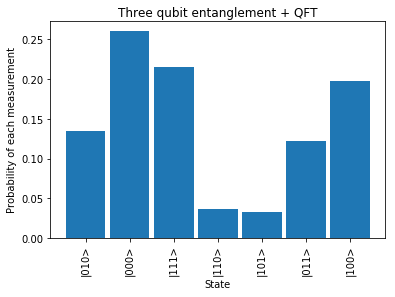

In [6]:
try:
    state=[]
    probability=[]
    for i in out.stdout.split("Done.\n")[1].split("\n"):
        i=i.split(" ")
        if (i[0]!=""):
            state.append("|{}>".format(i[0]))
            probability.append(float(i[-1].split("*")[0]))
    ind = np.arange(len(state))
    plt.bar(ind,probability,0.9)
    plt.xticks(ind+0.45,state,rotation="vertical")
    plt.title("Three qubit entanglement + QFT")
    plt.ylabel("Probability of each measurement")
    plt.xlabel("State")
except:
    print("Error spliting data....")
    print(out)
    

    

Print the real executed program on the IBM QPU that ProjectQ has created for you.

In [7]:
print(out)

- Authenticating...
- Running code: 
include "qelib1.inc";
qreg q[3];
creg c[3];
h q[2];
cx q[2], q[1];
cx q[2], q[0];
u1(0.392699081698) q[2];
h q[0];
u1(0.785398163398) q[0];
u1(0.785398163398) q[1];
cx q[1], q[0];
u1(11.780972450962) q[0];
cx q[1], q[0];
u1(0.392699081698) q[0];
cx q[2], q[0];
u1(12.173671532661) q[0];
cx q[2], q[0];
u1(0.785398163398) q[2];
h q[1];
u1(0.785398163398) q[1];
cx q[2], q[1];
u1(11.780972450962) q[1];
cx q[2], q[1];
h q[2];
measure q[2] -> c[2];
measure q[1] -> c[1];
measure q[0] -> c[0];
- Waiting for results...
Waiting for results. [Job ID: 5c44c91d718f2300542fb4de]
- Done.
010 with p = 0.134765625
000 with p = 0.2607421875*
111 with p = 0.21484375
110 with p = 0.037109375
101 with p = 0.033203125
011 with p = 0.1220703125
100 with p = 0.197265625

